## Solutions

Compute the value function, policy and equilibrium prices

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

ae = Arellano_Economy(β=.953,        # time discount rate
                      γ=2.,          # risk aversion
                      r=0.017,       # international interest rate
                      ρ=.945,        # persistence in output
                      η=0.025,       # st dev of output shock
                      θ=0.282,       # prob of regaining access
                      ny=21,         # number of points in y grid
                      nB=251,        # number of points in B grid
                      tol=1e-8,      # error tolerance in iteration
                      maxit=10000)

Running iteration 25 with dist of 0.34324232989002823


Running iteration 50 with dist of 0.09839155779848241


Running iteration 75 with dist of 0.029212095591656606


Running iteration 100 with dist of 0.00874510696905162


Running iteration 125 with dist of 0.002623141215579494


Running iteration 150 with dist of 0.0007871926699110077


Running iteration 175 with dist of 0.00023625911163449587


Running iteration 200 with dist of 7.091000628989264e-05


Running iteration 225 with dist of 2.1282821137447172e-05


Running iteration 250 with dist of 6.387802962137812e-06


Running iteration 275 with dist of 1.917228964032347e-06


Running iteration 300 with dist of 5.754352905285032e-07


Running iteration 325 with dist of 1.7271062091595013e-07


Running iteration 350 with dist of 5.1837215409022974e-08


Running iteration 375 with dist of 1.555838125000264e-08


Compute the bond price schedule as seen in figure 3 of Arellano (2008)

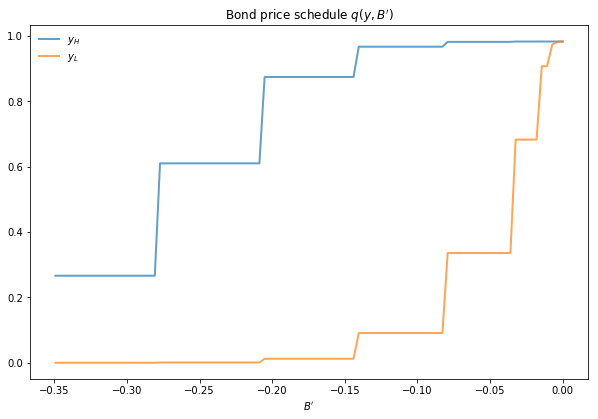

In [4]:
# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(ae.ygrid) * 1.05, np.mean(ae.ygrid) * .95
iy_high, iy_low = (np.searchsorted(ae.ygrid, x) for x in (high, low))

fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Bond price schedule $q(y, B')$")

# Extract a suitable plot grid
x = []
q_low = []
q_high = []
for i in range(ae.nB):
    b = ae.Bgrid[i]
    if -0.35 <= b <= 0:  # To match fig 3 of Arellano
        x.append(b)
        q_low.append(ae.Q[iy_low, i])
        q_high.append(ae.Q[iy_high, i])
ax.plot(x, q_high, label="$y_H$", lw=2, alpha=0.7)
ax.plot(x, q_low, label="$y_L$", lw=2, alpha=0.7)
ax.set_xlabel("$B'$")
ax.legend(loc='upper left', frameon=False)
plt.show()

Draw a plot of the value functions

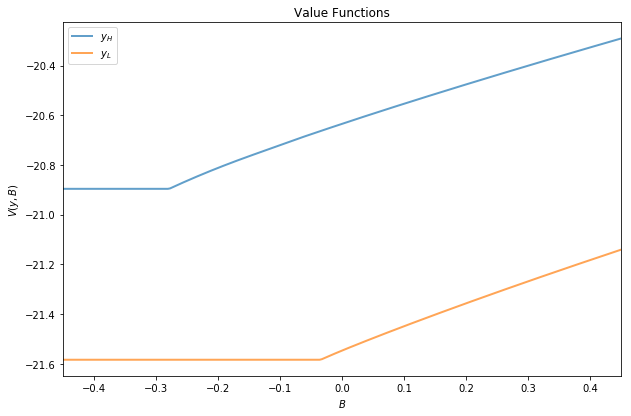

In [5]:
# Create "Y High" and "Y Low" values as 5% devs from mean
high, low = np.mean(ae.ygrid) * 1.05, np.mean(ae.ygrid) * .95
iy_high, iy_low = (np.searchsorted(ae.ygrid, x) for x in (high, low))

fig, ax = plt.subplots(figsize=(10, 6.5))
ax.set_title("Value Functions")
ax.plot(ae.Bgrid, ae.V[iy_high], label="$y_H$", lw=2, alpha=0.7)
ax.plot(ae.Bgrid, ae.V[iy_low], label="$y_L$", lw=2, alpha=0.7)
ax.legend(loc='upper left')
ax.set(xlabel="$B$", ylabel="$V(y, B)$")
ax.set_xlim(ae.Bgrid.min(), ae.Bgrid.max())
plt.show()

Draw a heat map for default probability

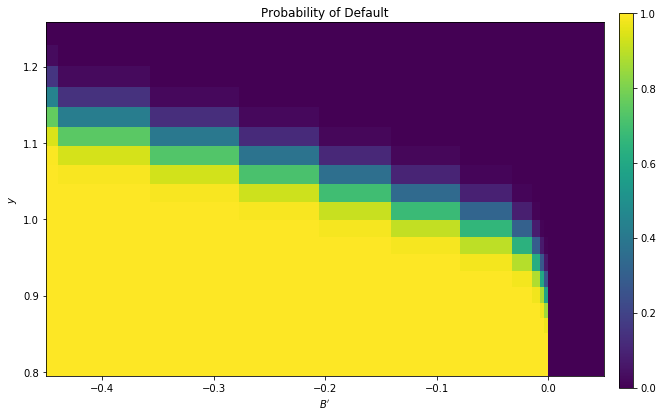

In [6]:
xx, yy = ae.Bgrid, ae.ygrid
zz = ae.default_prob

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.5))
hm = ax.pcolormesh(xx, yy, zz)
cax = fig.add_axes([.92, .1, .02, .8])
fig.colorbar(hm, cax=cax)
ax.axis([xx.min(), 0.05, yy.min(), yy.max()])
ax.set(xlabel="$B'$", ylabel="$y$", title="Probability of Default")
plt.show()

Plot a time series of major variables simulated from the model

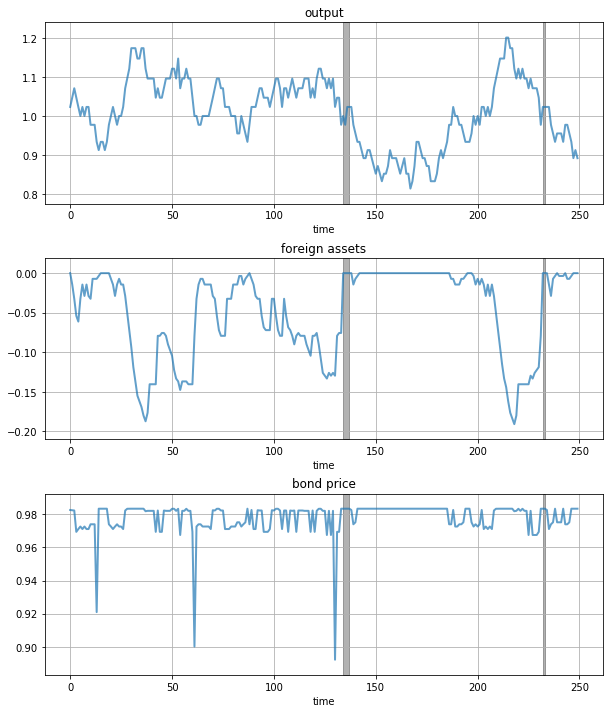

In [7]:
T = 250
y_vec, B_vec, q_vec, default_vec = ae.simulate(T)

# Pick up default start and end dates
start_end_pairs = []
i = 0
while i < len(default_vec):
    if default_vec[i] == 0:
        i += 1
    else:
        # If we get to here we're in default
        start_default = i
        while i < len(default_vec) and default_vec[i] == 1:
            i += 1
        end_default = i - 1
        start_end_pairs.append((start_default, end_default))

plot_series = y_vec, B_vec, q_vec
titles = 'output', 'foreign assets', 'bond price'

fig, axes = plt.subplots(len(plot_series), 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.3)

for ax, series, title in zip(axes, plot_series, titles):
    # determine suitable y limits
    s_max, s_min = max(series), min(series)
    s_range = s_max - s_min
    y_max = s_max + s_range * 0.1
    y_min = s_min - s_range * 0.1
    ax.set_ylim(y_min, y_max)
    for pair in start_end_pairs:
        ax.fill_between(pair, (y_min, y_min), (y_max, y_max),
                        color='k', alpha=0.3)
    ax.grid()
    ax.plot(range(T), series, lw=2, alpha=0.7)
    ax.set(title=title, xlabel="time")

plt.show()